In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# 이미지 필터링이 잘 되는 이미지
image_path = 'eggs/0823112955_0_07383-01_0.jpg'
#image_path = 'eggs/0823112958_0_07386-05_0.jpg'

# 이미지 필터링이 잘 안되는 이미지
#image_path = 'eggs/0823112958_0_07386-10_3.jpg'

# 기울어진 계란 처리 필요
#image_path = 'eggs/0823113001_1_07389_4.jpg'

file=eggs/0823112955_0_07383-01_0.jpg shape=(304, 240, 3)


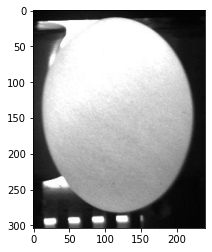

In [3]:
img = cv.imread(image_path)
#img = cv.imread('0823112958_0_07386-05_0.jpg')
#img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img)
print(f'file={image_path} shape={img.shape}')

In [4]:
#img

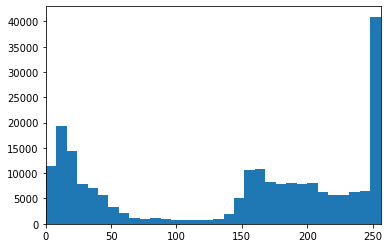

In [5]:
fig, ax = plt.subplots(1, 1)
ax.hist(img.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [6]:
def convert_triangle(image):
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    ret,binary=cv.threshold(gray,0,255, cv.THRESH_BINARY | cv.THRESH_TRIANGLE)
    return binary

def apply_filter(image):
    blurred = cv.GaussianBlur(image, (3, 3), 0)
    gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
    xgrad = cv.Sobel(gray, cv.CV_16SC1, 1, 0)
    ygrad = cv.Sobel(gray, cv.CV_16SC1, 0, 1)
    output = cv.Canny(xgrad, ygrad, 35, 165)
    return output

def find_one(binary):
    contours, hireachy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    large_area = 0
    rect = None
    for i, contour in enumerate(contours):
        area = cv.contourArea(contour)
        length = cv.arcLength(contour, True)
        x, y, w, h = cv.boundingRect(contour)
        area = w * h
        if area > large_area: # 가장 큰 contour 영역이 계란일 확률이 큼으로 이를 구함
            large_area = area
            rect =  (x, y, w, h)
    return rect
    contours, hireachy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    large_area = 0
    result = None
    # 가장 큰 contour 영역이 계란일 확률이 큼으로 이를 구함
    for i, contour in enumerate(contours):
        area = cv.contourArea(contour)
        length = cv.arcLength(contour, True) #contourlength
        x, y, w, h = cv.boundingRect(contour) #boundingRect
        #rate = min(w, h)/max(w, h) #1/egg shape index
        area = w * h
        if area > large_area:
            large_area = area
            x_radius = w // 2 - 2
            y_radius = h // 2 - 2
            (center_x, center_y) = (x + x_radius, y + y_radius)
            result = (binary, (center_x, center_y), (x_radius, y_radius))
    return result
        
def get_mask_info(image):
    return find_one(apply_filter(image))


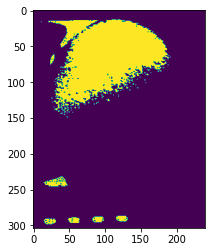

In [7]:
triangle = convert_triangle(img)
plt.imshow(triangle)

In [8]:
filtered = apply_filter(img.copy())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

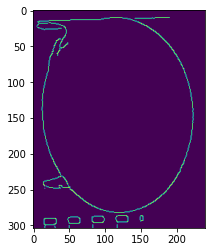

In [9]:
plt.imshow(filtered)
filtered

contours=20
hireachy=[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [-1 18 -1 -1]]]
[19] len=1234.5727161169052 5 10 219 273 0.8021978021978022
[19] center=114 146 radius=109 136


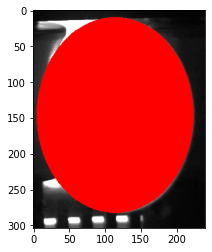

In [10]:
binary = filtered
contours, hireachy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f'contours={len(contours)}')
print(f'hireachy={hireachy}')
large_area = 0
result = None
for i, contour in enumerate(contours):
    area = cv.contourArea(contour) #contourArea
    length = cv.arcLength(contour,True) #contourlength
    x, y, w, h = cv.boundingRect(contour) #boundingRect
    rate = min(w, h)/max(w, h) #1/egg shape index
    if h > 150 and w > 100:
        x_radius = w // 2
        y_radius = h // 2
        (center_x, center_y) = (x + x_radius, y + y_radius)
        #tmp = cv.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)
        print(f'[{i}] len={length} {x} {y} {w} {h} {rate}')
        print(f'[{i}] center={center_x} {center_y} radius={x_radius} {y_radius}')
        tmp = cv.ellipse(img.copy(),(center_x, center_y),(x_radius, y_radius), 0, 0, 360, 255, -1)
        plt.imshow(tmp)
#if approxCurve.shape[0] > 6:
#cv.drawContours(dst, contours, i, (0, 255,255), 2) #The outline of the
#outline polygon fitting number >6 is yellow

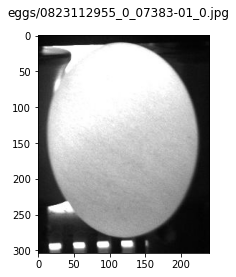

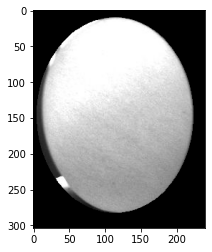

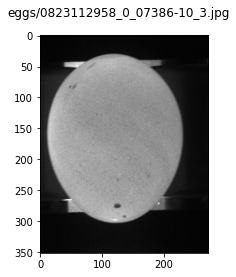

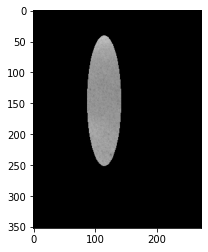

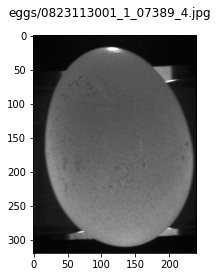

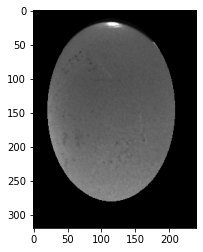

In [15]:
image_list = [
    'eggs/0823112955_0_07383-01_0.jpg',
    #'eggs/0823112958_0_07386-05_0.jpg',
    'eggs/0823112958_0_07386-10_3.jpg',
    'eggs/0823113001_1_07389_4.jpg',
]
for img_path in image_list:
    img = cv.imread(img_path)
    img2 = img.copy()
    rect = get_mask_info(img2)
    if rect:
        # ref https://github.com/ArunJayan/OpenCV-Python/blob/master/masking.py
        mask = np.zeros(img2.shape[:2],dtype="uint8")
        x, y, w, h = rect
        x_radius = w // 2
        y_radius = h // 2
        cv.ellipse(mask, (center_x, center_y), (x_radius, y_radius), 0, 0, 360, (255, 255, 255), -1)
        applyed = cv.bitwise_and(img2, img2, mask=mask)
        fig=plt.figure()
        fig.suptitle(img_path)
        plt.imshow(img)
        plt.figure()
        plt.imshow(applyed)
    else:
        print(f"cannot find mask: {img_path}")